<a href="https://colab.research.google.com/github/ashfaknawshad/surya/blob/master/suryaocr_mvp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ==============================================================================
# STEP 1: INSTALLATION
# Install the library and its dependencies.
# ==============================================================================
print("⏳ Installing surya-ocr... (This may take a couple of minutes)")
!pip install surya-ocr -q --upgrade
!pip install pillow matplotlib requests -q

print("\n✅ Step 1 Complete: Installation finished.")



⏳ Installing surya-ocr... (This may take a couple of minutes)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.4/183.4 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 100.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 107.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 39.9 MB/s eta 0:00:00

✅ Step 1 Complete: Installation finished.


In [3]:
# ==============================================================================
# STEP 2: IMPORTS
# We only import the documented Predictor classes and standard libraries.
# ==============================================================================
try:
    from PIL import Image, ImageDraw
    import matplotlib.pyplot as plt
    import requests
    import os

    # These are the correct, documented classes for the core logic
    from surya.detection import DetectionPredictor
    from surya.recognition import RecognitionPredictor

    os.environ["TOKENIZERS_PARALLELISM"] = "false"

    print("✅ Step 2 Complete: Libraries imported successfully.")
except ImportError as e:
    print(f"❌ Import Error: {e}")

# ==============================================================================
# STEP 3: OUR CUSTOM VISUALIZATION FUNCTION
# This replaces the faulty import. It uses the standard PIL library to draw.
# ==============================================================================
def draw_ocr_results(image, prediction):
    """
    Draws the bounding box polygons from a surya prediction onto an image.
    Args:
        image (PIL.Image): The original image.
        prediction: The prediction object from surya's RecognitionPredictor.
    Returns:
        PIL.Image: A copy of the image with bounding boxes drawn on it.
    """
    draw = ImageDraw.Draw(image)
    # The prediction object contains a list of polygons for each text line
    for line in prediction.text_lines:
        polygon = line.polygon
        # The polygon is a list of (x, y) tuples
        draw.polygon(polygon, outline="red", width=2)
    return image

✅ Step 2 Complete: Libraries imported successfully.


In [5]:
# ==============================================================================
# STEP 5: INITIALIZE MODELS (THE CORRECT WAY)
# This section is now corrected according to the documentation.
# ==============================================================================
print("\n⏳ Initializing models... (This will download model files and can take a few minutes)")
foundation_predictor = FoundationPredictor()
detection_predictor = DetectionPredictor()
# THE FIX: Pass the foundation_predictor when creating the RecognitionPredictor
recognition_predictor = RecognitionPredictor(foundation_predictor)

print("✅ Step 5 Complete: Models initialized correctly.")


⏳ Initializing models... (This will download model files and can take a few minutes)


✅ Step 5 Complete: Models initialized correctly.


In [10]:
# ==============================================================================
# STEP 6: DEFINE THE PROCESSING FUNCTION AND RUN
# ==============================================================================
def process_and_visualize(image_path):
    if not os.path.exists(image_path):
        print(f"❌ Image not found at {image_path}. Skipping.")
        return

    print(f"\n--- Processing: {image_path} ---")
    image = Image.open(image_path).convert("RGB")

    # STEP 6a: First, run detection to find the bbox objects
    print("   -> Step 1: Detecting text boxes...")
    detection_predictions = detection_predictor([image])
    detection_prediction = detection_predictions[0]

    # Convert the list of PolygonBox objects into a simple
    # list of numerical coordinates that the next function expects.
    # Each 'box_object' has a '.bbox' attribute containing the numbers.
    numerical_bboxes = [box_object.bbox for box_object in detection_prediction.bboxes]

    # STEP 6b: Second, run recognition using the correctly formatted numerical bboxes
    print("   -> Step 2: Recognizing text...")
    recognition_predictions = recognition_predictor([image], bboxes=[numerical_bboxes])
    recognition_prediction = recognition_predictions[0]

    # --- Visualization ---
    image_with_boxes = draw_ocr_results(image.copy(), recognition_prediction)

    plt.figure(figsize=(15, 15))
    plt.imshow(image_with_boxes)
    plt.title(f'OCR Result for {image_path}')
    plt.axis('off')
    plt.show()

    # --- Print Extracted Text ---
    print("\n--- Extracted Text Lines ---")
    for line in recognition_prediction.text_lines:
        print(line.text)
    print("----------------------------\n")


--- Processing: /content/eng1.jpg ---
   -> Step 1: Detecting text boxes...


Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]


   -> Step 2: Recognizing text...


Recognizing Text: 100%|██████████| 26/26 [00:01<00:00, 14.13it/s]


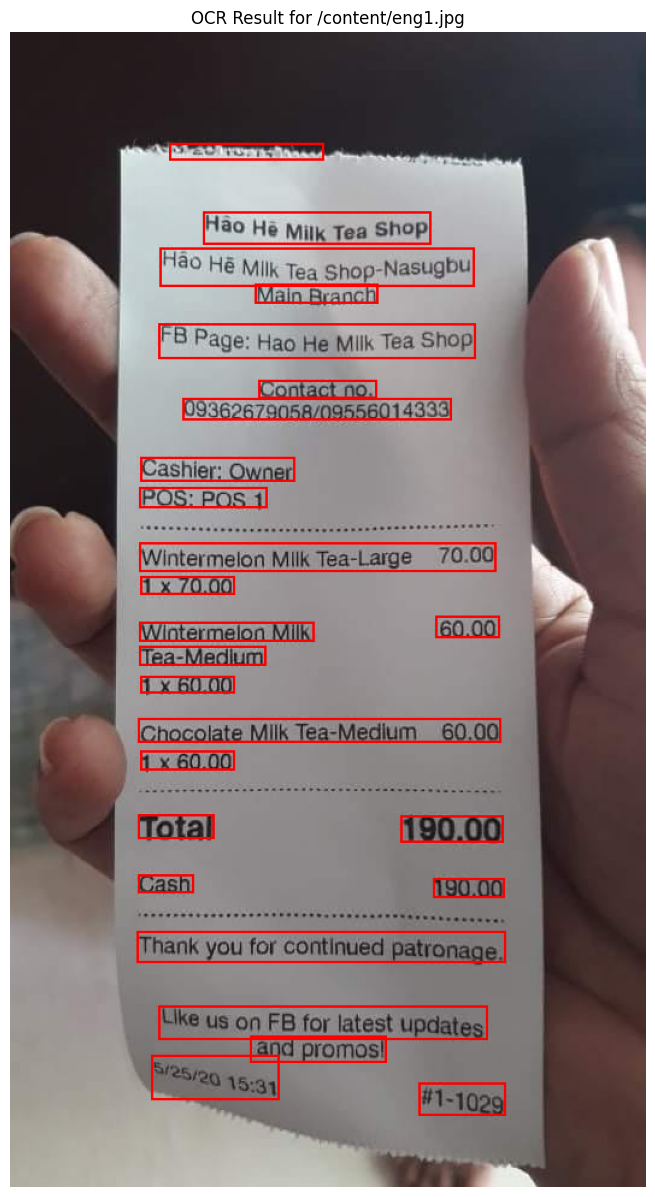


--- Extracted Text Lines ---
Of the latest the same
Hão Hệ Milk Tea Shop
Hão Hệ Milk Tea Shop-Nasugbu
Main Branch
FB Page: Hao He Milk Tea Shop
Contact no.
09362679058/09556014333
Cashier: Owner
POS: POS 1
Wintermelon Milk Tea-Large 70.00
1 x 70.00
60.00
Wintermelon Milk
Tea-Medlum
1 x 60.00
Chocolate Milk Tea-Medium 60.00
1 x 60.00
Total
190.00
Cash
190.00
Thank you for continued patronage.
Like us on FB for latest updates
and promosl
5/25/20 15:31
#1-1029
----------------------------


--- Processing: /content/sin1.jpg ---
   -> Step 1: Detecting text boxes...


Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]


   -> Step 2: Recognizing text...


Recognizing Text: 100%|██████████| 59/59 [00:01<00:00, 30.30it/s]


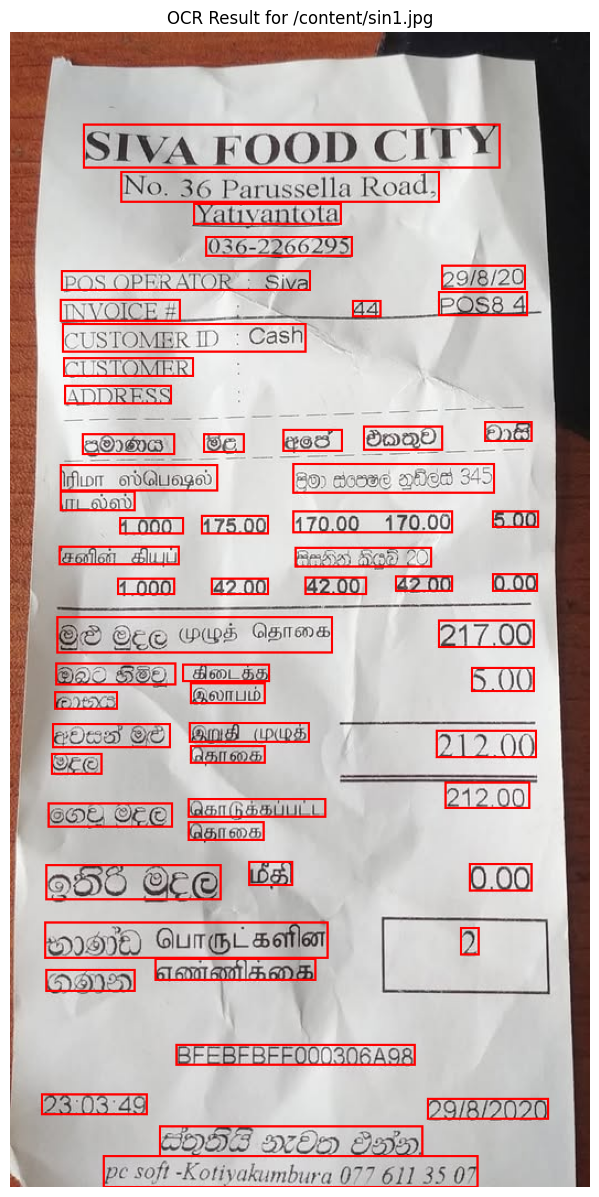


--- Extracted Text Lines ---
SIVA FOOD CITY
No. 36 Parussella Road,
Yativantota
036-2266295
29/8/20
POS OPERATOR : Siva
<b>POS8 4</b>
44
INVOICE #
CUSTOMER ID : Cash
CUSTOMER
<b>ADDRESS</b>
වාසි
එකතුව
අපේ
10 C
පුමාණය
ළිතා ස්පෙෂල් නුඩ්ලස් 345
ரிமா ஸ்பெஷல்
ாடல்ஸ்
5.00
170.00 170.00
175.00
1.000
'சனின் கியுப்
සිසනින් කියම් 20
0.00
42.00
42.00
1.000
42.00
මුළු මුදල முழுத் தொகை
217.00
ඔබට හිමිව
கிடைத்த
5.00
இலாபம்
ලාභය
இறுதி முழுத்
අවසන් මුළු
212.00
கொகை
@£@
212.00
கொடுக்கப்பட்ட
ගෙවූ මුදල
கொகை
மீதி
0.00
ඉතිරි මුදල
<del>භ</del>ාණුඩ பொருட்களின
2
எண்ணிக்கை
ගුණුන
BFEBFBFF000306A98
23:03:49
29/8/2020
ස්තුතියි නැවත එන්න.
pc soft -Kotiyakumbura 077 611 35 07
----------------------------

✅ MVP script finished successfully!


In [11]:
# Run the process for both images
process_and_visualize("/content/eng1.jpg")
process_and_visualize("/content/sin1.jpg")

print("✅ MVP script finished successfully!")